In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

### Importing data

In [3]:
df = pd.read_csv("clean_data/all_players.csv")
names = df.last_name

### Dropping non-numeric columns

In [4]:
df.drop(columns=["team_code", "first_name", "last_name", "position"], inplace=True)

In [5]:
x = df.values
x

array([[ 9,  0,  0, ...,  0,  0,  0],
       [ 3,  2,  2, ...,  0,  0,  0],
       [10, 13, 11, ...,  0,  0,  0],
       ...,
       [ 8, 13,  8, ...,  0,  0,  0],
       [ 2,  0,  0, ...,  0,  0,  0],
       [ 4,  0,  0, ...,  0,  0,  0]], dtype=int64)

### Scaling values

In [6]:
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

### Carrying out PCA

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA(n_components=2)

In [9]:
reduced = pd.DataFrame(pca.fit_transform(X_norm))

In [10]:
from sklearn.cluster import KMeans

In [11]:
kmeans = KMeans(n_clusters=5)
kmeans = kmeans.fit(reduced)
kmeans

KMeans(n_clusters=5)

In [12]:
labels = kmeans.predict(reduced)

array([4, 3, 1, 1, 1, 0, 4, 4, 3, 0, 3, 3, 3, 2, 4, 4, 0, 0, 1, 4, 4, 0,
       2, 4, 2, 4, 4, 4, 1, 3, 4, 3, 1, 0, 2, 2, 4, 3, 1, 1, 3, 2, 4, 4,
       0, 2, 2, 0, 0, 0, 3, 0, 0, 4, 4, 3, 4, 4, 0, 0, 3, 3, 3, 3, 2, 3,
       0, 1, 3, 2, 1, 3, 0, 1, 1, 4, 4, 4, 1, 1, 4, 4, 4, 3, 1, 4, 3, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 3, 0, 1, 2, 2, 3, 2, 4, 0, 1, 4, 3,
       2, 1, 3, 3, 4, 4, 1, 4, 1, 4, 3, 3, 3, 3, 1, 4, 4, 0, 4, 4, 4, 3,
       0, 4, 2, 4, 3, 1, 0, 0, 2, 4, 0, 4, 0, 1, 1, 1, 4, 2, 0, 2, 1, 0,
       1, 3, 4, 0, 1, 3, 1, 0, 0, 0, 1, 3, 0, 0, 1, 4, 0, 4, 2, 4, 1, 2,
       2, 4, 0, 4, 3, 1, 0, 3])

In [13]:
centroid = kmeans.cluster_centers_

In [14]:
clusters = kmeans.labels_.tolist()

In [15]:
reduced['cluster'] = clusters

In [16]:
reduced['names'] = names 
reduced

,0,1,cluster,names
0,-0.110767,0.705760,4,Ghitelman
1,-0.348833,-0.199906,3,Sims
2,0.880094,-0.174178,1,McIntosh
3,0.741611,0.281471,1,Cuccinello
4,0.550056,0.407938,1,Eipp
...,...,...,...,...
179,-0.120779,0.490780,4,Warner
180,-0.473312,-0.080519,3,Paparo
181,0.471315,-0.275108,1,Haus
182,-0.718642,-0.419478,0,McCallion


In [17]:
reduced.columns = ['x', 'y', 'cluster', 'name']
reduced.head()

,x,y,cluster,name
0,-0.110767,0.705760,4,Ghitelman
1,-0.348833,-0.199906,3,Sims
2,0.880094,-0.174178,1,McIntosh
3,0.741611,0.281471,1,Cuccinello
4,0.550056,0.407938,1,Eipp


In [18]:
import seaborn as sns
#sns.set(style="white")

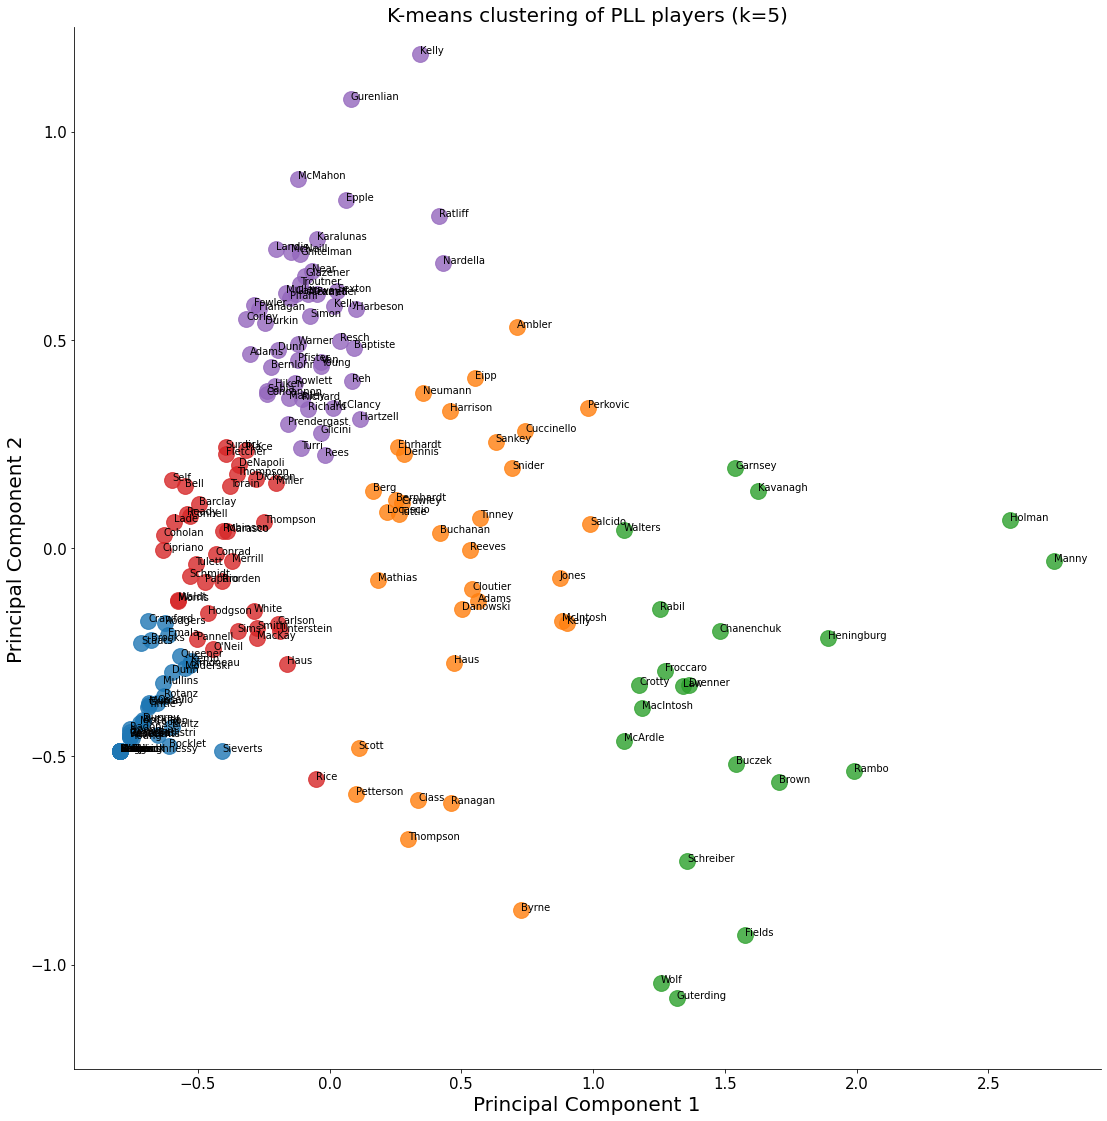

In [26]:
ax = sns.lmplot(x="x", y="y", hue='cluster', data = reduced, legend=False,
fit_reg=False, height = 15, scatter_kws={"s": 250})
texts = []
for x, y, s in zip(reduced.x, reduced.y, reduced.name):
    texts.append(plt.text(x, y, s))
    ax.set(ylim=(-1.25, 1.25))
    plt.tick_params(labelsize=15)
    plt.xlabel("Principal Component 1", fontsize = 20)
    plt.ylabel("Principal Component 2", fontsize = 20)
    plt.title("K-means clustering of PLL players (k=5)", fontsize = 20)
plt.savefig("img/clustering-attmept1.svg", dpi=300, pad_inches=0, bbox_inches ='tight')
plt.show()